In [ ]:
### Homogeneidad de dos grupos

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
os.listdir("./Datos/")

In [ ]:
df=pd.read_csv("./Datos/homogeneidad2grupos.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
grupo1=df[df.position==1.0]
grupo2=df[df.position==2.0]

In [ ]:
grupo1.shape

In [ ]:
grupo2.shape

In [ ]:
from scipy.stats import levene

In [ ]:
levene?

$$H_0 : \sigma_1 = \sigma_2$$
$$H_1: \sigma_1 \neq \sigma_2$$

In [ ]:
levene(grupo1.salary,grupo2.salary)

In [ ]:
levene(grupo1.salary,grupo2.salary,center="mean")

## Ejercicios 
del fichero homogenidasd3grupo estudiar si tienen la misma varainza los tres o dos a dos.
**Estudiad si tienen la misma media**

## MANN WHITNEY o Prueba U
### Para detectar si dos grupos son independientes
Por cada grupo necesitaremos más de 20 muestra

In [ ]:
os.listdir("./Datos")

In [ ]:
df=pd.read_csv('./Datos/forceps.csv')

In [ ]:
df

* Estadar son los Forceps=1
* Jumbo son los Forceps=2
¿diferencias significativas?

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
grupo1=df[df.Forceps==1.0]
grupo2=df[df.Forceps==2.0]

In [ ]:
mannwhitneyu?

In [ ]:
mannwhitneyu(grupo1.Resection,grupo2.Resection)

In [ ]:
grupo1.Resection.unique()

$$ H_0: \mu_1 \geq \mu_2$$ 
$$ H_1: \mu_1 < \mu_2$$

In [ ]:
mannwhitneyu(grupo1.Resection,grupo2.Resection,alternative="less")

Utilizad el fichero de salarios para ver que grupo tiene mayor sueldo

In [ ]:
### Como detectar si sigue una distribución normal
## Manera gráfica
import statsmodels.api as sm

In [ ]:
df.head(1)

In [ ]:
sm.qqplot(df["Resection"],fit=True,line='q');

In [ ]:
salarios=pd.read_csv("./Datos/homogeneidad2grupos.csv")

In [ ]:
sm.qqplot(salarios["salary"],fit=True,line='q');

In [ ]:
salarios=pd.read_csv("./Datos/homogeneidad3grupos.csv")

In [ ]:
sm.qqplot(salarios["salary"],fit=True,line='q');

In [ ]:
from scipy.stats import normaltest

In [ ]:
normaltest(salarios["salary"])

In [ ]:
normaltest?

In [ ]:
from scipy.stats import anderson

In [ ]:
anderson(salarios.salary)

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(salarios.salary)

## Krustall Wallis
Se realzia un estudio sobre drogas en el que se compara clasificaciomnes de dolor.
Se suministran cuatro grupos de dosis:
* valor1 100 mg
* valor2 250 mg
* valor3 500 mg
* valor4 1000 mg


In [ ]:
drogas=pd.read_csv('./Datos/drugstudy.csv')

In [ ]:
drogas.info()

In [ ]:
drogas.describe().T

In [ ]:
drogas.describe(include="all").T

In [ ]:
drogas.dose.value_counts(normalize=True)

In [ ]:
grupo1=drogas[drogas.dose==1]
grupo2=drogas[drogas.dose==2]
grupo3=drogas[drogas.dose==3]
grupo4=drogas[drogas.dose==4]

In [ ]:
drogas.groupby(["dose"]).mean()

In [ ]:
from scipy.stats import kruskal

In [ ]:
kruskal?

In [ ]:
kruskal(grupo1.rating,grupo2.rating,grupo3.rating,grupo4.rating)

In [ ]:
estadistico,pvalor=kruskal(grupo1.rating,grupo2.rating,grupo3.rating,grupo4.rating)
if pvalor>0.05:
    print("No rechazamos H0")
else:
    print("Rechazamos H0")

$$ \binom{4}{2} = \cfrac{4!}{(2!(4-2)!)} = \cfrac{4\times 3}{2}$$

In [ ]:
Rechazados={}
Aceptados={}
s=0
h=0
for i in range(1,4):
    for j in range(i+1,5):
        grupo1=drogas[drogas.dose==i]
        grupo2=drogas[drogas.dose==j]
        stat, p = mannwhitneyu(grupo1.rating,grupo2.rating,
                               alternative='two-sided')
        print("="*20)
        if p > 0.05:
            s+=1
            Aceptados[s]=[i,j]
            # print('No rechazamos H0: No hay diferencias significativas entre los grupos {0} y {1}.'.format(i,j))
        else:
            h+=1
	        # print('Rechazamos H0: Hay diferencias significativas entre los grupos {0} y {1}.'.format(i,j))
            Rechazados[h]=[i,j]

In [ ]:
Rechazados={}
Aceptados={}
s=0
for i,j in [(x,y) for x in drogas.dose.unique() for y in drogas.dose.unique() if x<y]:
    s+=1
    stat, p = mannwhitneyu(drogas[drogas.dose==i].rating,drogas[drogas.dose==j].rating,alternative='two-sided')
    if p > 0.05:
        Aceptados[s]=[i,j]
    else:
        Rechazados[s]=[i,j]

In [ ]:
Rechazados

In [ ]:
Aceptados

In [2]:
### Wilcoxon
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon


In [3]:
df=pd.read_csv('./Datos/revenuedata.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q1      18 non-null     float64
 1   Q2      18 non-null     float64
dtypes: float64(2)
memory usage: 416.0 bytes


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Q1,18.0,941415.166667,455134.520736,437477.0,531321.0,787176.0,1236987.25,1792376.0
Q2,18.0,788682.777778,503100.254425,283875.0,388587.5,616081.5,972938.00,1820474.0


In [9]:
df.head()

,Q1,Q2
0,528819.0,329778.0
1,1263689.0,504738.0
2,1172512.0,989454.0
3,1647341.0,1465183.0
4,528419.0,351158.0


In [6]:
from statsmodels.stats.diagnostic import normal_ad
from scipy.stats import shapiro

In [8]:
normal_ad(df.Q1)

(0.7254672844627201, 0.047903777406905844)

In [7]:
shapiro(df.Q1)

ShapiroResult(statistic=0.8859636187553406, pvalue=0.032929033041000366)

In [11]:
print(normal_ad(df.Q2))
print(shapiro(df.Q2))

(1.062961278378065, 0.00643096243773041)
ShapiroResult(statistic=0.8476520776748657, pvalue=0.007778363302350044)


In [12]:
wilcoxon?

Signature:
wilcoxon(
    x,
    y=None,
    zero_method='wilcox',
    correction=False,
    alternative='two-sided',
    mode='auto',
)
Docstring:
Calculate the Wilcoxon signed-rank test.

The Wilcoxon signed-rank test tests the null hypothesis that two
related paired samples come from the same distribution. In particular,
it tests whether the distribution of the differences x - y is symmetric
about zero. It is a non-parametric version of the paired T-test.

Parameters
----------
x : array_like
    Either the first set of measurements (in which case ``y`` is the second
    set of measurements), or the differences between two sets of
    measurements (in which case ``y`` is not to be specified.)  Must be
    one-dimensional.
y : array_like, optional
    Either the second set of measurements (if ``x`` is the first set of
    measurements), or not specified (if ``x`` is the differences between
    two sets of measurements.)  Must be one-dimensional.
zero_method : {"pratt", "wilcox", "zspl

In [15]:
wilcoxon(df.Q1,df.Q2)

WilcoxonResult(statistic=32.0, pvalue=0.0182342529296875)

$$ H_0: P(X>Y) \leq P(Y>X)$$
$$ H_1: P(X>Y) > P(Y>X)$$

In [16]:
wilcoxon(df.Q1,df.Q2,alternative='less')

WilcoxonResult(statistic=139.0, pvalue=0.992034912109375)

In [18]:
df#.sample(2)

,Q1,Q2
0,528819.0,329778.0
1,1263689.0,504738.0
2,1172512.0,989454.0
3,1647341.0,1465183.0
4,528419.0,351158.0
5,505763.0,342215.0
6,437477.0,283875.0
7,452378.0,308403.0
8,764158.0,629594.0
9,1792376.0,1707832.0


* $H_0$: la probabilidad de una obsrvación de la primera poblacion X sea mayor que una observacion de la segunda  poblacióin Y es igual a a la probabilidad de que una obsrvación de la segunda poblacion Y sea mayor que una observacion de la primera poblacióin X $$P(X>Y)=P(Y>X)$$

* $H_1$: la probabilidad de una obsrvación de la primera poblacion X sea mayor que una observacion de la segunda  poblacióin Y  no es igual a a la probabilidad de que una obsrvación de la segunda poblacion Y sea mayor que una observacion de la primera poblacióin X $$P(X>Y)\neq P(Y>X)$$

## Friedman
es al aalterniativa no parametrica de la ANOVA.
Es una extension del anterior.
Se utiliza para estudiar por ejemplo el rendimiento de grupos .
* Si los futbolistas estan en mejor forma en en cada estación.
* Si los empleados dependiendo del día de la semana son más eficaces.

In [20]:
Vino=pd.read_csv('./Datos/wine.csv')

In [23]:
Vino.head()

,Judge,pinecreek,saintjude,northnapa,sevenwinds,eternalvalley
0,1.0,6.0,3.0,3.0,5.0,3.0
1,2.0,7.0,4.0,4.0,4.0,4.0
2,3.0,6.0,5.0,4.0,5.0,3.0
3,4.0,7.0,3.0,2.0,4.0,2.0
4,5.0,5.0,4.0,3.0,4.0,4.0


In [25]:
Vino.shape

(10, 6)

In [26]:
from scipy.stats import friedmanchisquare

In [29]:
friedmanchisquare(Vino.pinecreek,
Vino.saintjude,
Vino.northnapa,
Vino.sevenwinds,
Vino.eternalvalley)

FriedmanchisquareResult(statistic=29.893491124260347, pvalue=5.144971162191748e-06)

In [30]:
Vino.shape

(10, 6)

'eternalvalley'

In [38]:
Rechazados={}
Aceptados={}
s=0
for i,j in [(x,y) for x in range(1,6) for y in range(1,6) if x<y]:
    s+=1
    stat, p = wilcoxon(Vino[Vino.columns[i]],Vino[Vino.columns[j]],alternative='two-sided')
    if p > 0.05:
        Aceptados[s]=[Vino.columns[i],Vino.columns[j]]
    else:
        Rechazados[s]=[Vino.columns[i],Vino.columns[j]]

c:\Users\Daniel Montes\Anaconda3\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\Daniel Montes\Anaconda3\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [39]:
Aceptados

{5: ['saintjude', 'northnapa'],
 6: ['saintjude', 'sevenwinds'],
 7: ['saintjude', 'eternalvalley'],
 9: ['northnapa', 'eternalvalley']}

In [40]:
Rechazados

{1: ['pinecreek', 'saintjude'],
 2: ['pinecreek', 'northnapa'],
 3: ['pinecreek', 'sevenwinds'],
 4: ['pinecreek', 'eternalvalley'],
 8: ['northnapa', 'sevenwinds'],
 10: ['sevenwinds', 'eternalvalley']}

In [41]:
## coeficiente de correlacion de spearmanr

In [42]:
from scipy.stats import spearmanr

In [43]:
spearmanr?

Signature:
spearmanr(
    a,
    b=None,
    axis=0,
    nan_policy='propagate',
    alternative='two-sided',
)
Docstring:
Calculate a Spearman correlation coefficient with associated p-value.

The Spearman rank-order correlation coefficient is a nonparametric measure
of the monotonicity of the relationship between two datasets. Unlike the
Pearson correlation, the Spearman correlation does not assume that both
datasets are normally distributed. Like other correlation coefficients,
this one varies between -1 and +1 with 0 implying no correlation.
Correlations of -1 or +1 imply an exact monotonic relationship. Positive
correlations imply that as x increases, so does y. Negative correlations
imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system
producing datasets that have a Spearman correlation at least as extreme
as the one computed from these datasets. The p-values are not entirely
reliable but are probably reasonable for datas

In [44]:
forc=pd.read_csv('./Datos/forceps.csv')

In [45]:
forc.head()

,Forceps,Resection
0,2.0,2.0
1,1.0,2.0
2,2.0,3.0
3,1.0,1.0
4,1.0,2.0


In [46]:
spearmanr(forc.Forceps,forc.Resection)

SpearmanrResult(correlation=0.4905700574607901, pvalue=0.023951568341931413)

$H_0$ correlacion no significativa $\to$ muestras están incorreladas


$H_1$ correlacion es significativa $\to$ muestras están correladas

In [47]:
import matplotlib.pyplot as plt

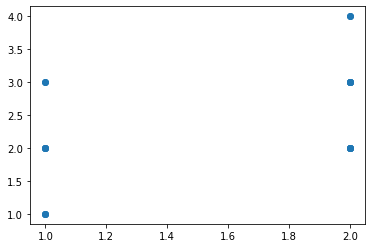

In [48]:
plt.scatter(forc.Forceps,forc.Resection)

### Kendall o $\tau$-Kendall

In [49]:
from scipy.stats import kendalltau

In [50]:
kendalltau?

Signature:
kendalltau(
    x,
    y,
    initial_lexsort=None,
    nan_policy='propagate',
    method='auto',
    variant='b',
)
Docstring:
Calculate Kendall's tau, a correlation measure for ordinal data.

Kendall's tau is a measure of the correspondence between two rankings.
Values close to 1 indicate strong agreement, and values close to -1
indicate strong disagreement. This implements two variants of Kendall's
tau: tau-b (the default) and tau-c (also known as Stuart's tau-c). These
differ only in how they are normalized to lie within the range -1 to 1;
the hypothesis tests (their p-values) are identical. Kendall's original
tau-a is not implemented separately because both tau-b and tau-c reduce
to tau-a in the absence of ties.

Parameters
----------
x, y : array_like
    Arrays of rankings, of the same shape. If arrays are not 1-D, they
    will be flattened to 1-D.
initial_lexsort : bool, optional
    Unused (deprecated).
nan_policy : {'propagate', 'raise', 'omit'}, optional
    Def

In [51]:
kendalltau(forc.Resection,forc.Forceps)

KendalltauResult(correlation=0.4572176441790554, pvalue=0.028242887576206643)

$H_0$ correlacion no significativa $\to$ muestras están incorreladas


$H_1$ correlacion es significativa $\to$ muestras están correladas